In [10]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [ ]:
individuals = 50
cross_over_prob = 0.6
mutation_prob = 0.1

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#images = np.concatenate((x_train, x_test))
#labels = np.concatenate((y_train, y_test))

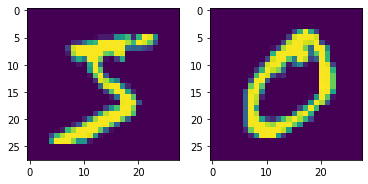

In [4]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(images[0]) 
ax[1].imshow(images[1])

In [116]:
def euclidean(images):
    # https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
    return np.linalg.norm(images)

def p_fitness(individual, target, pred, label):
    return -(0.5*euclidean(individual-target) + 0.5*euclidean(pred-label))

def flatten(imgs):
    return np.array([im.flatten() for im in imgs])

def gaussian_noise():
    return np.random.normal(0, np.sqrt(1), 1)

def k_crossover(im1, im2, k=2):
    c1, c2 = [], []
    points = sorted([np.random.randint(0, 783, 1) for p in range(k)])
    im_1_split = np.split(im1, [int(p) for p in points])
    im_2_split = np.split(im2, [int(p) for p in points])
    for i in range(k+1):
        if i % 2 == 0:
            c1.append(im_1_split[i])
            c2.append(im_2_split[i])
        else:
            c1.append(im_2_split[i])
            c2.append(im_1_split[i])
    return np.concatenate(c1, axis=0), np.concatenate(c2, axis=0)

In [117]:
v, w = k_crossover(X[0],X[1])

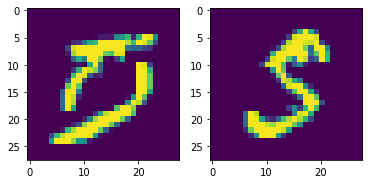

In [119]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(v.reshape(28,28)) 
ax[1].imshow(w.reshape(28,28))

In [19]:
X = flatten(x_train)
X_t = flatten(x_test)
svm = SVC()
svm.fit(X, y_train)
svm.score(X_t, y_test)